### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [2]:
#setting options to be able to see whole text in dataframe columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('max_colwidth',800)

In [4]:
train= pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

### Data Cleaning

We first began with renaming the columns by lowercasing.

In [5]:
train.columns=train.columns.str.replace(" ","_").str.lower()

In [6]:
train.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 16,719 rows and 16 columns

In [7]:
train.shape

(16719, 16)

Then we looked at the null values for the dataset. There are multiple columns with large number of null values, as it can be seen from critic score, critic count, user score, user count, developer, and rating.

In [8]:
train.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

When looking at the two null values in the name column, due to there being 8 null values in each of the rows. We thought it would be better to drop the null two rows. 

In [9]:
train.loc[train['name'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


The null values that are found in the genre column were the same as the name column, so those will be dropped as well. 

In [10]:
train.loc[train['genre'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


Due to publisher and knowing what company was involved in the process plays an important role in how people feel the game will be, I think its necessary to have the publisher and due to it only being 54, it was better of dropping the values. 

In [11]:
train.loc[train['publisher'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3755,SpongeBob SquarePants: Game Boy Advance Video Volume 2,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4127,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+
4508,The Fairly Odd Parents: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4615,The Fairly Odd Parents: Game Boy Advance Video Volume 2,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN


The year the game was released is important when it comes to up to date visualization and other metircs, without the necessary information about it, we can drop the rows that are NaN. 

In [12]:
train.loc[train['year_of_release'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,92.0,72.0,8.2,178.0,Harmonix Music Systems,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.51,0.61,0.00,0.21,2.34,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
719,Call of Duty 3,Wii,NaN,Shooter,Activision,1.17,0.84,0.00,0.23,2.24,69.0,42.0,6.7,61.0,Exakt,T
805,Rock Band,Wii,NaN,Misc,MTV Games,1.33,0.56,0.00,0.20,2.08,80.0,21.0,6.3,37.0,Harmonix Music Systems,T


Dropping na's for Name, Year of release, Genre, Py=ublisher

In [76]:
train.dropna(subset=['name','year_of_release','genre','publisher'], inplace=True)

In [77]:
train.shape

(16416, 16)

The dtypes were looked at and saw that year of release was a float and user_score was an object.

In [78]:
train.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score          object
user_count         float64
developer           object
rating              object
dtype: object

The code was used to change the year of release column from a float to an int.

In [79]:
train['year_of_release']=train['year_of_release'].astype('int').astype('object')

Looked at the numerical statistics and to see if there are some outliers. Critic count seemed to have some outliers as well as well as each of the sales column

In [80]:
train.describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000
mean,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,563.932422
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [81]:
train.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8434
critic_count       8434
user_score         6579
user_count         8955
developer          6512
rating             6649
dtype: int64

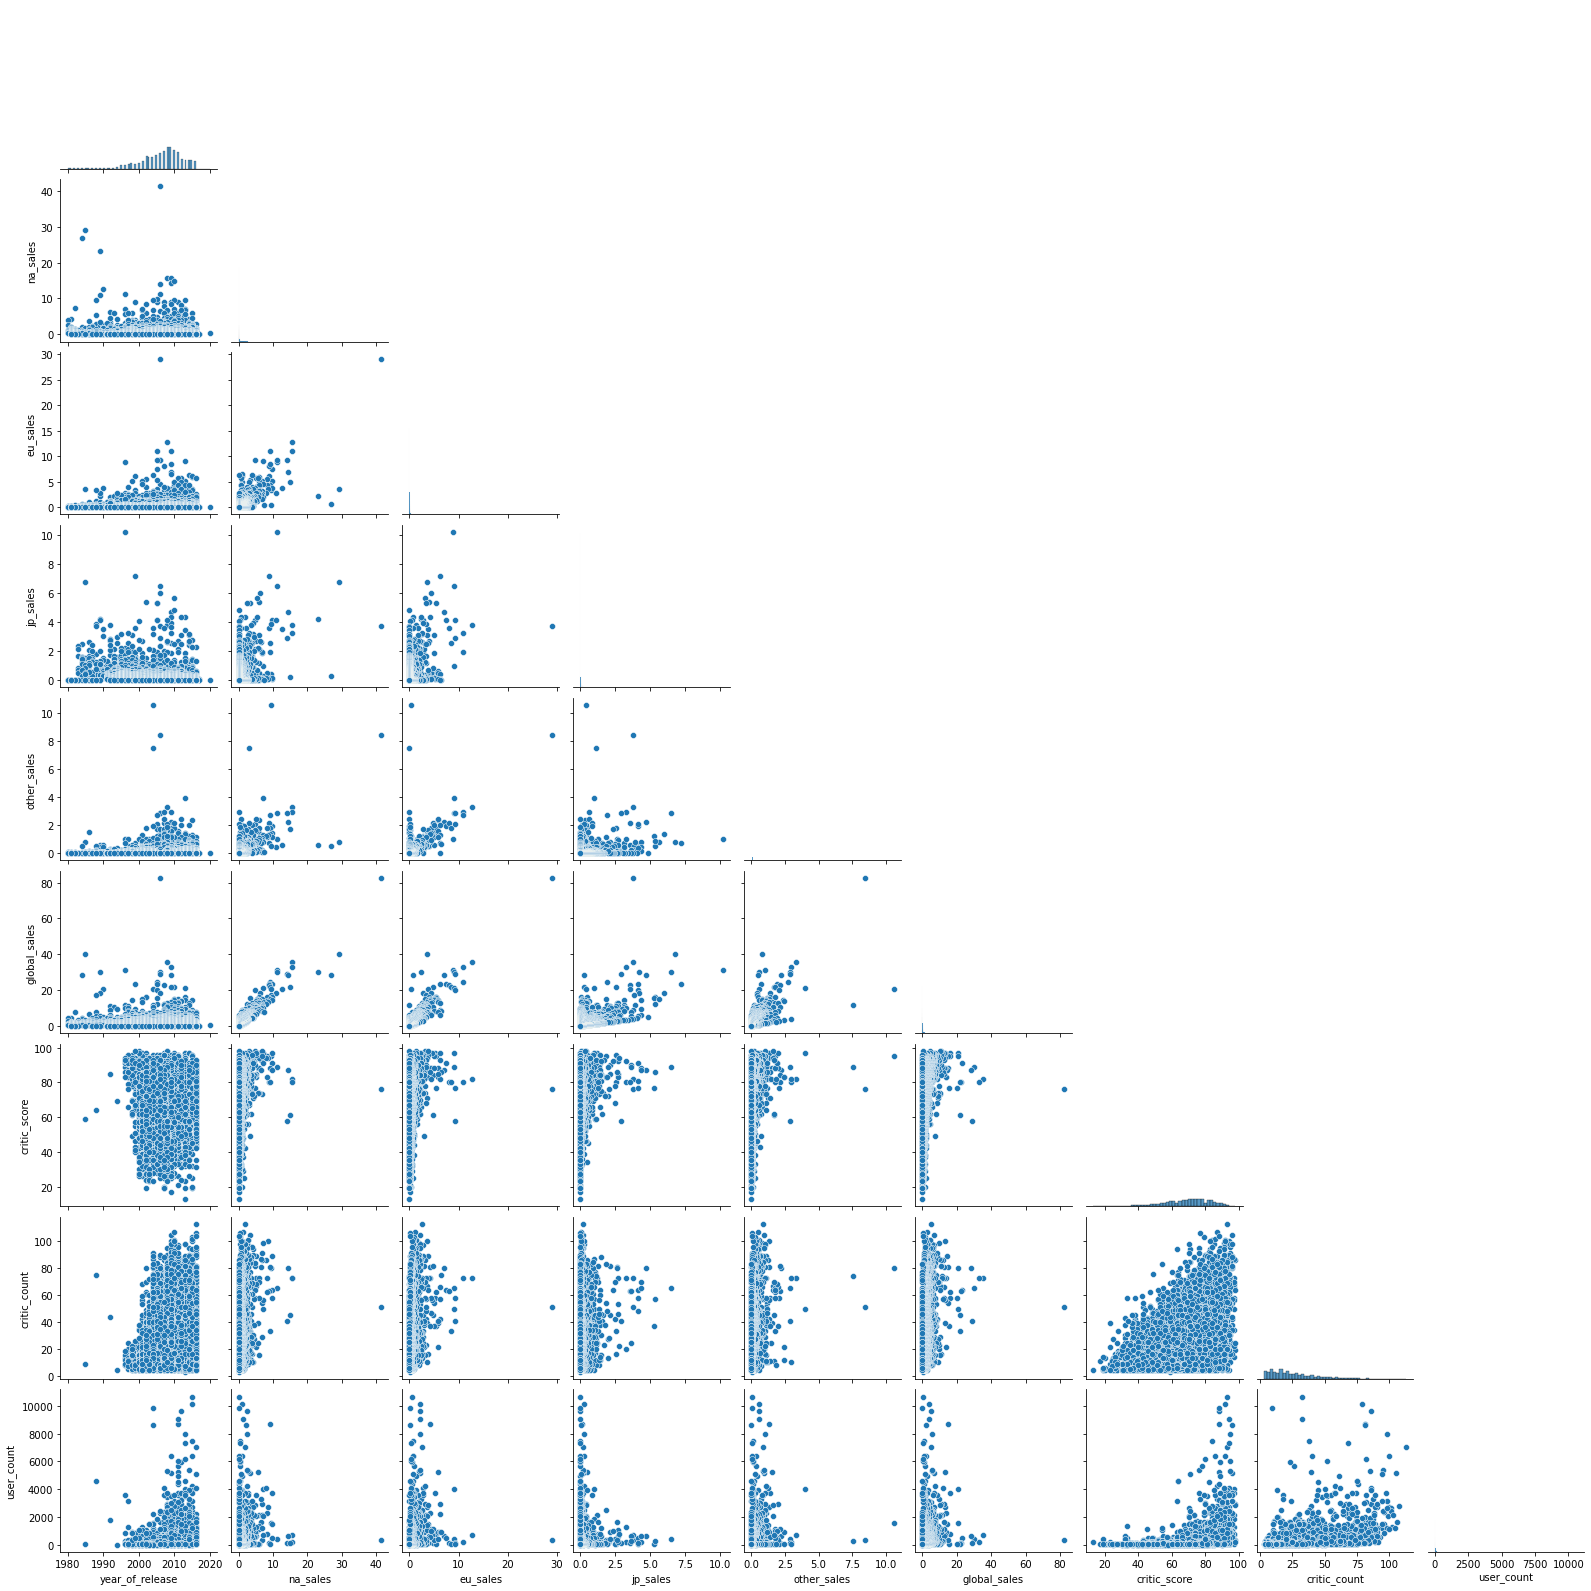

In [82]:
sns.pairplot(train, corner=True);

There does not seems to be a strong linear relationship between any of the numerical features and global sales. Following heatmap shows the similar results.

Text(0.5, 1.0, 'Train Correlation Matrix Heatmap ')

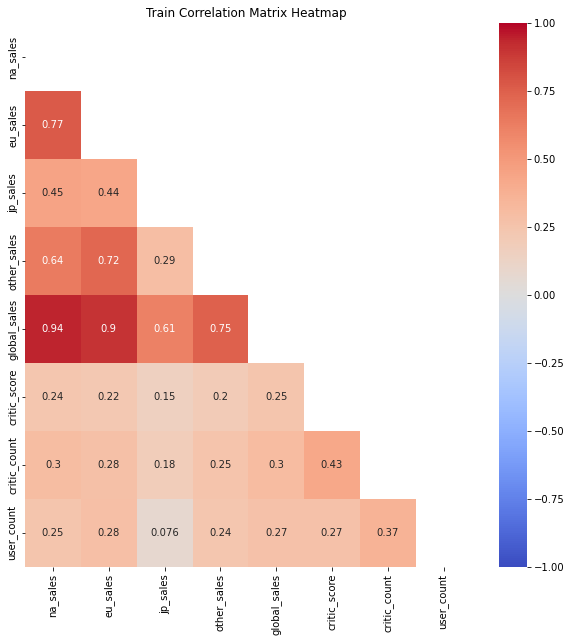

In [83]:
#Checking for multicollinearity

mask=np.zeros_like(train.corr())

mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),
           cmap='coolwarm',
           annot=True,
           mask=mask,
           vmin=-1,
           vmax=1)
plt.title('Train Correlation Matrix Heatmap ')

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


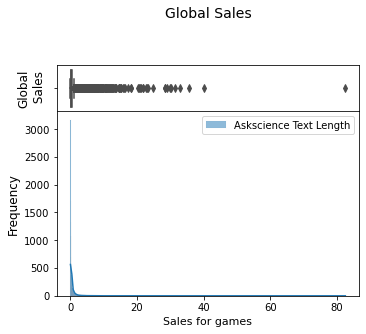

In [84]:
#Global sales distribution

figure, ax = plt.subplots(2,1, gridspec_kw={'height_ratios':[1,4]});
figure.tight_layout();

#Distribution plots

ax[0]=plt.subplot(2,1,2);
ax[0]=sns.histplot(train['global_sales'] , 
             label='Askscience Text Length', 
             kde=True,
            alpha=.5);

ax[0].set_title('Global Sales', fontsize=14,y=1.4, pad=20);
ax[0].set_ylabel('Frequency', size=12);
ax[0].set_xlabel('Sales for games', size=11);
ax[0].legend();

#Boxplots
ax[1]=plt.subplot(2,1,1);
ax[1]=sns.boxplot(train['global_sales'],color='red');
ax[1].set_ylabel('Global\n Sales', size=12);



plt.subplots_adjust(hspace=0);
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1);
# plt.savefig('../images/text_length_distn.png');


C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


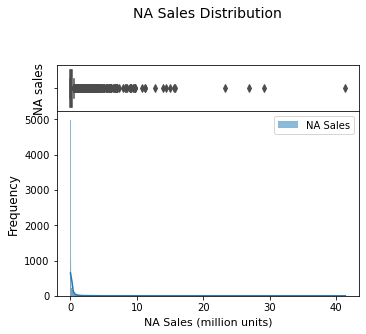

In [85]:
#Global sales distribution

figure, ax = plt.subplots(2,1, gridspec_kw={'height_ratios':[1,4]});
figure.tight_layout();

#Distribution plots

ax[0]=plt.subplot(2,1,2);
ax[0]=sns.histplot(train['na_sales'] , 
             label='NA Sales', 
             kde=True,
            alpha=.5);

ax[0].set_title('NA Sales Distribution', fontsize=14,y=1.4, pad=20);
ax[0].set_ylabel('Frequency', size=12);
ax[0].set_xlabel('NA Sales (million units)', size=11);
ax[0].legend();

#Boxplots
ax[1]=plt.subplot(2,1,1);
ax[1]=sns.boxplot(train['na_sales'],color='red');
ax[1].set_ylabel('NA sales', size=12);



plt.subplots_adjust(hspace=0);
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1);
# plt.savefig('../images/text_length_distn.png');

There were two outliers that had over 40 for the global sales, but we dropped over the 60 global sale values

In [86]:
train[train['global_sales']>40]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#Dropping the outlier with gloabl sales > 60
train=train[train['global_sales']<60].copy()

In [88]:
#Checking cleaned data
categorical_col=['name','platform','genre','publisher','rating']

for col in categorical_col:
    print('VALUE COUNTS')
    print(f'Column name: {col}')
    print(train[col].value_counts())
    print('---------------------')


VALUE COUNTS
Column name: name
Need for Speed: Most Wanted                                                                                                             12
Ratatouille                                                                                                                              9
FIFA 14                                                                                                                                  9
LEGO Marvel Super Heroes                                                                                                                 9
Madden NFL 08                                                                                                                            8
Cars                                                                                                                                     8
LEGO Jurassic World                                                                                                                    

Looking at categorical columns: genre and rating in reation to global sales

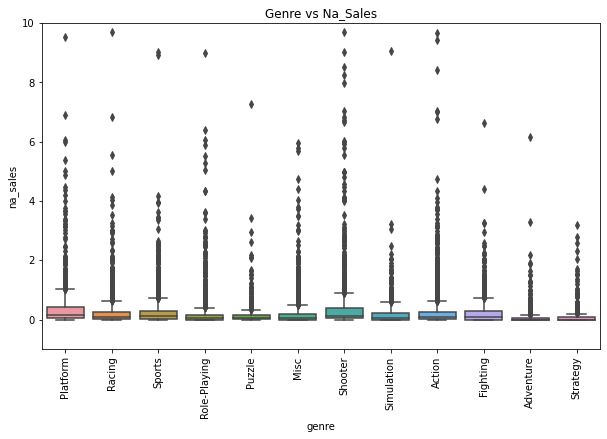

In [89]:
#Looking at name as a feature
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='genre', y='na_sales')
plt.ylim(-1,10)
plt.xticks(rotation=90)
plt.title('Genre vs Na_Sales');

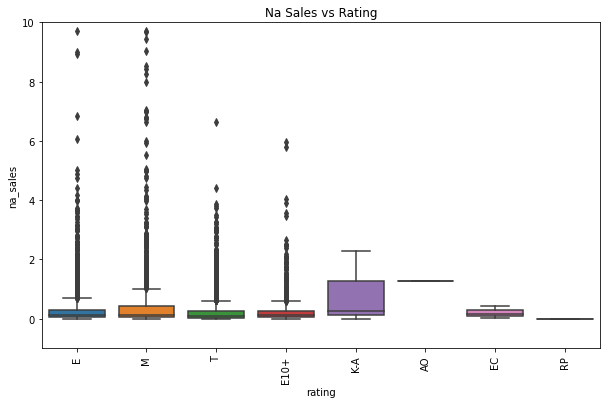

In [90]:
#Looking at name as a feature
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='rating', y='na_sales')
plt.ylim(-1,10)
plt.xticks(rotation=90)
plt.title('Na Sales vs Rating');

From the different games that were seen, there were 11396 unique names. 

In [91]:
train['name'].nunique()

11396

The plot before shows the different names of games that had the highest value count in which we looked at the top 5. 

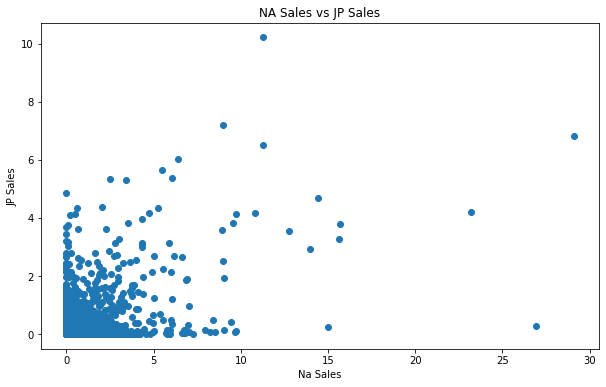

In [92]:

plt.figure(figsize=(10,6))
plt.scatter(x=train['na_sales'],y=train['jp_sales'])
plt.ylabel('JP Sales')
plt.xlabel('Na Sales')
plt.title('NA Sales vs JP Sales');

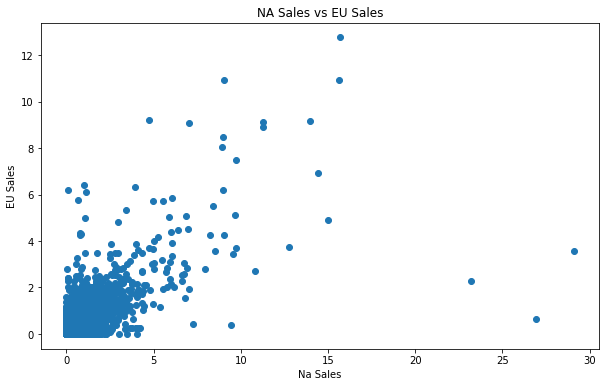

In [93]:

plt.figure(figsize=(10,6))
plt.scatter(x=train['na_sales'],y=train['eu_sales'])
plt.ylabel('EU Sales')
plt.xlabel('Na Sales')
plt.title('NA Sales vs EU Sales');

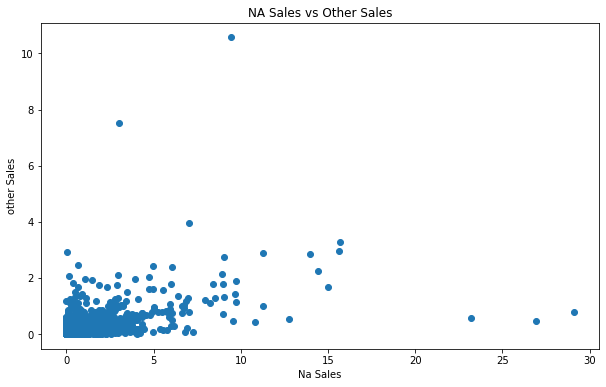

In [94]:
#Looking at name as a feature
plt.figure(figsize=(10,6))
plt.scatter(x=train['na_sales'],y=train['other_sales'])
plt.ylabel('other Sales')
plt.xlabel('Na Sales')
plt.title('NA Sales vs Other Sales');

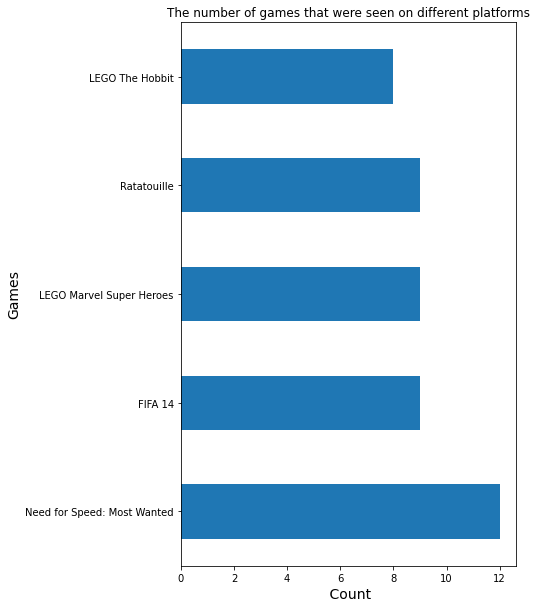

In [95]:
plt.figure(figsize=(6,10))
train['name'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh')
plt.title('The number of games that were seen on different platforms')
plt.ylabel('Games',size=14)
plt.xlabel(' Count',size=14);

The plot below looks at each platform and the number of games that are coming out of each of the games. 

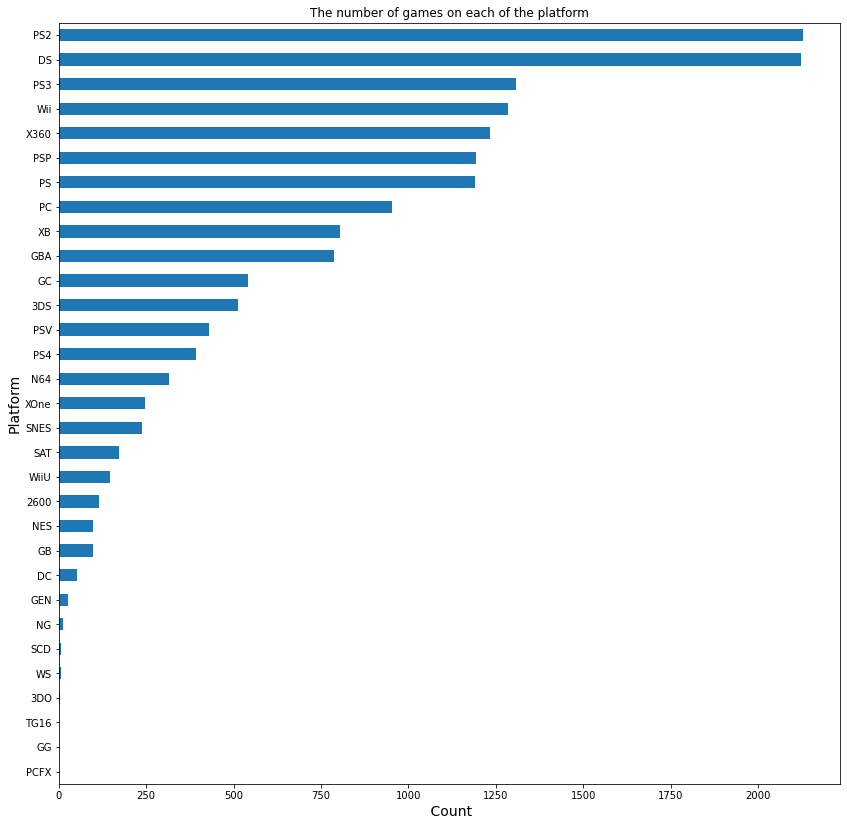

In [96]:
plt.figure(figsize=(14,14))
train['platform'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('The number of games on each of the platform')
plt.ylabel('Platform', size=14)
plt.xlabel(' Count',size=14);

The plot below looks at the genre that had the most number of games or large number of them. 

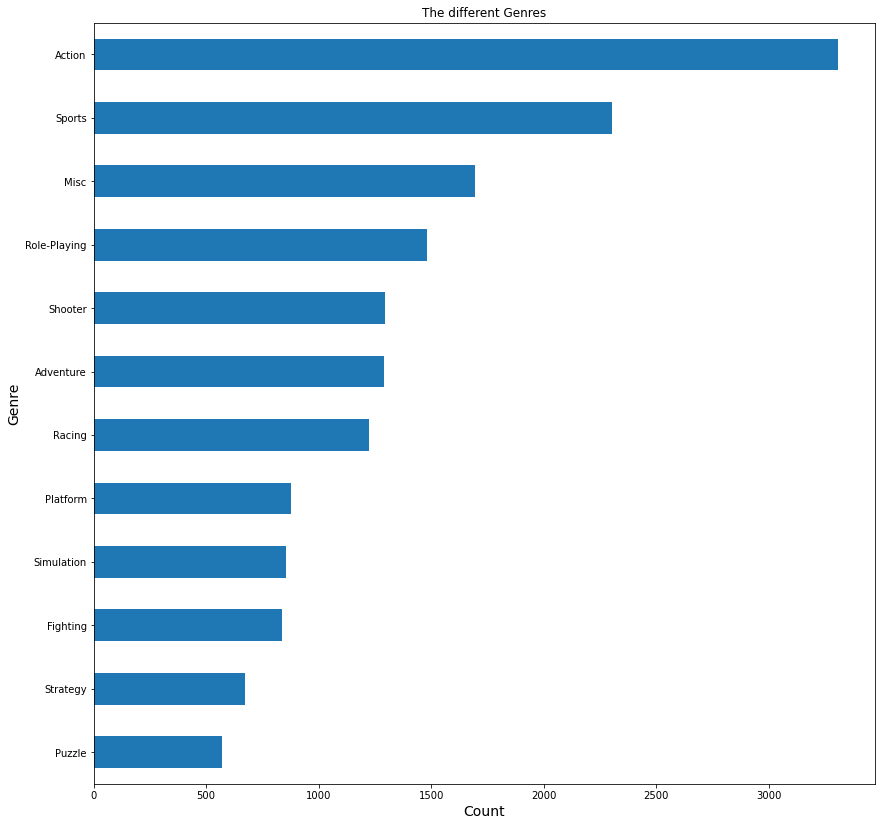

In [97]:
plt.figure(figsize = (14,14))
train['genre'].value_counts().sort_values(ascending = True).plot(kind = 'barh');
plt.title('The different Genres')
plt.ylabel('Genre',size=14)
plt.xlabel('Count',size=14);

The plot below looks at the publishers and who made the most number of games. 

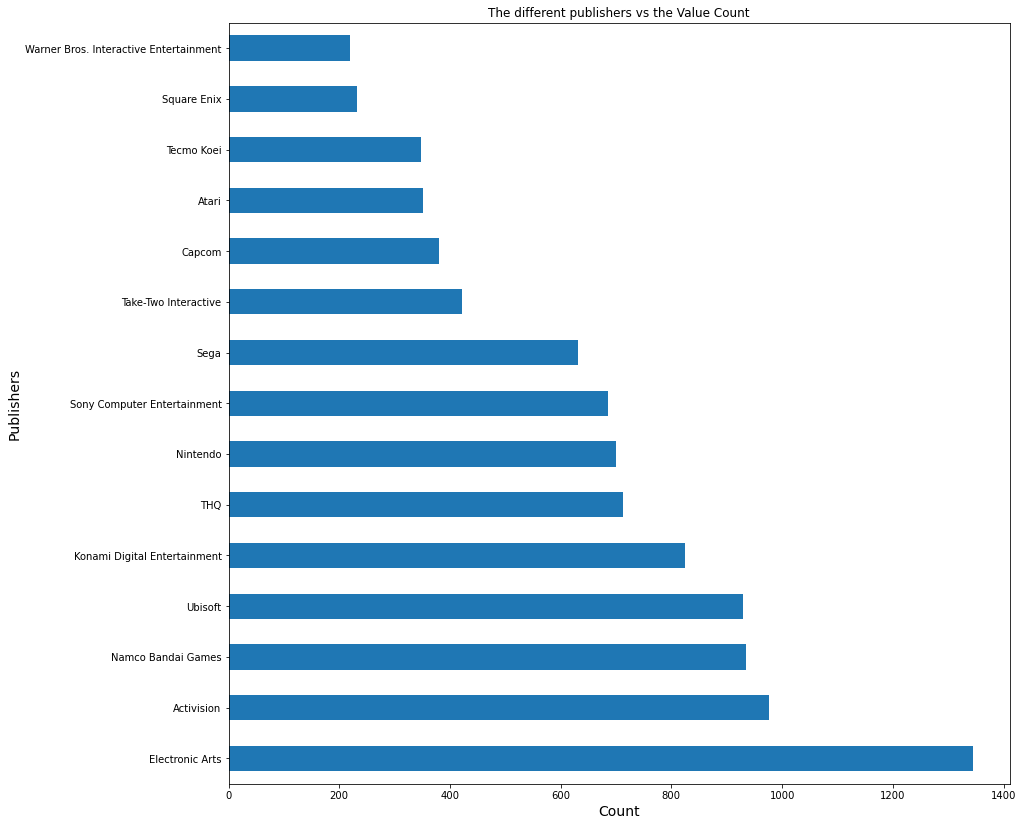

In [98]:
plt.figure(figsize = (14,14))
train['publisher'].value_counts().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('The different publishers vs the Value Count')
plt.ylabel('Publishers',size=14)
plt.xlabel('Count',size=14);

### Pre-processing

In [99]:
train.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
train.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8434
critic_count       8434
user_score         6579
user_count         8955
developer          6512
rating             6649
dtype: int64

Columns: critic count and user count have large number of null values, and looking at the pairplots and heatmap, there does not seem to be strong correlation between these features and global sales so dropping these columns, 
Dropping 'Developer' because it has large number of null values and we already have publisher which gives similar information as Developer, Dropping rating as well

In [101]:
train_master=train
train.drop(columns=['critic_count','user_count','developer','rating'], inplace=True)

In [102]:
train.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8434
user_score         6579
dtype: int64

We went back to look at the dtypes and saw that user score was object so we needed to change that

In [103]:
train.dtypes

name                object
platform            object
year_of_release     object
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
user_score          object
dtype: object

We did a value counts and saw that tbd had over 2376

In [104]:
#looking at 'user_score' since its an object
train['user_score'].value_counts()

tbd    2376
7.8     322
8       284
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
8.4     221
7       215
7.4     213
7.6     213
8.6     209
6.8     191
8.7     186
7.1     180
8.8     179
7.2     166
8.9     151
6.6     145
6.9     138
6.3     135
6.7     125
6       123
6.5     121
9       119
6.2     112
6.4     105
5.8      97
9.1      89
6.1      82
5.7      77
5.9      76
5.6      72
5.4      71
5.3      70
5.5      69
5        64
5.2      54
4.8      49
5.1      44
9.2      43
4.9      39
4.6      37
4.3      37
4.4      33
4.5      32
9.3      31
4.1      31
4.2      27
4        27
3.8      27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        20
3.7      19
3.6      18
3.3      15
3.9      13
2.5      12
3.2      12
2.4      11
9.4      11
2        10
2.1       9
1.7       9
2.9       9
2.7       7
2.2       6
9.5       5
1.8       5
1.4       5
2.6       4
1.6       3
1.2       3
0.5       2
1         2
0.9 

replacing 'tbd' in user_score with NA - to be imputed by iterative imputer later

In [105]:
train['user_score']=train['user_score'].map(lambda x: 'NaN' if x=='tbd' else x)

In [106]:
train['user_score'].value_counts()

NaN    2376
7.8     322
8       284
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
8.4     221
7       215
7.4     213
7.6     213
8.6     209
6.8     191
8.7     186
7.1     180
8.8     179
7.2     166
8.9     151
6.6     145
6.9     138
6.3     135
6.7     125
6       123
6.5     121
9       119
6.2     112
6.4     105
5.8      97
9.1      89
6.1      82
5.7      77
5.9      76
5.6      72
5.4      71
5.3      70
5.5      69
5        64
5.2      54
4.8      49
5.1      44
9.2      43
4.9      39
4.6      37
4.3      37
4.4      33
4.5      32
9.3      31
4.1      31
4.2      27
4        27
3.8      27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        20
3.7      19
3.6      18
3.3      15
3.9      13
2.5      12
3.2      12
2.4      11
9.4      11
2        10
2.1       9
1.7       9
2.9       9
2.7       7
2.2       6
9.5       5
1.8       5
1.4       5
2.6       4
1.6       3
1.2       3
0.5       2
1         2
0.9 

We then changed the user score from object to a float

In [107]:
train['user_score']=train['user_score'].astype(float)

In [108]:
train.dtypes;

**Train test split before imputing 'critic_score' and 'user_score'**

In [109]:
#choosing na_sales as target 
X=train.drop(columns=['name','na_sales', 'global_sales'])
y=train['na_sales']

In [110]:
X.shape, y.shape

((16415, 9), (16415,))

In [111]:
X_train,X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=0.2)

In [112]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13132, 9), (13132,), (3283, 9), (3283,))

In [113]:
X_train.dtypes

platform            object
year_of_release     object
genre               object
publisher           object
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
dtype: object

In [114]:
X_train.head()

,platform,year_of_release,genre,publisher,eu_sales,jp_sales,other_sales,critic_score,user_score
1633,Wii,2007,Action,D3Publisher,0.55,0.0,0.13,63.0,7.7
13967,XOne,2014,Action,Tecmo Koei,0.03,0.0,0.00,NaN,NaN
15330,PS,2000,Shooter,Midas Interactive Entertainment,0.01,0.0,0.00,NaN,NaN
14568,GBA,2003,Role-Playing,Marvelous Interactive,0.01,0.0,0.00,70.0,NaN
3302,X360,2008,Sports,Bethesda Softworks,0.00,0.0,0.05,70.0,5.9


We started to separate out the numerical columns with the categorical columns

In [115]:
num_col=X_train.select_dtypes(include=np.number).columns.tolist()
num_col

['eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

In [116]:
cat_col=X_train.select_dtypes(include= object).columns.tolist()
cat_col

['platform', 'year_of_release', 'genre', 'publisher']

After separating the columns, an imperative imputer was used to fill in the null values for both train and test scores. 

In [117]:
#Iterative imputer for 'critic_score' and 'user_score'

it_imp = IterativeImputer(estimator = LinearRegression())

X_train_imp = it_imp.fit_transform(X_train[num_col])

X_train_imp = pd.DataFrame(X_train_imp, columns=num_col)

# lesson missing data

In [118]:
X_test_imp = it_imp.transform(X_test[num_col])

X_test_imp = pd.DataFrame(X_test_imp, columns=num_col)

**functions to dummify the categorical columns**

In [119]:
def transform_train_cat (df, features):
    '''This function gets dummies for features 
    and saves column lists of dummies for training set'''
       
    #getting list of columns without dropping as a guide for reference:
    col_wo_drop=pd.get_dummies(df[features])
    dropped_col_guide=col_wo_drop.columns

    #dummyfying columns:
    df_dum=pd.get_dummies(data=df[features], drop_first=True)   
    
    
    #saving list of dummy columns
    df_dummies = [col for col in df_dum if "_" in col and col.rsplit("_",1)[0] in features]
    
    return ( dropped_col_guide, df_dum, df_dummies)

In [120]:
def transform_test_cat (df, df_dummies, features):
    '''This function gets dummies for features 
    for training set and removes the columns not created during training
    and adds the columns missing from test set'''
        
    #dummyfying columns:
    df_dum=pd.get_dummies(data=df[features], drop_first=True)   
    
    #Removing additional dummy columns
    for col in df_dum.columns:
        if ("_" in col) and (col.rsplit("_",1)[0] in features) and col not in df_dummies:
            print("Removing additional feature {}".format(col))
            df_dum.drop(col, axis=1, inplace=True)
            
    #Adding missing columns        
    for col in df_dummies:
        if col not in df_dum.columns:
            print("Adding missing feature {}".format(col))
            df_dum[col] = 0
    
    return df_dum

The dummified columns were then transformed

In [121]:
#We are getting some Future Warning that is an open issue
#Also some performance warning that can possibly be improved upon with more time in hand

X_train_cat_guide, X_train_dum, X_train_dummies=transform_train_cat(X_train, cat_col)

C:\Users\deepi\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\deepi\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [122]:
X_test_dum=transform_test_cat(X_test, X_train_dummies, cat_col)

C:\Users\deepi\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Removing additional feature year_of_release_2017
Removing additional feature year_of_release_2020
Removing additional feature publisher_Abylight
Removing additional feature publisher_Adeline Software
Removing additional feature publisher_Answer Software
Removing additional feature publisher_Aques
Removing additional feature publisher_Athena
Removing additional feature publisher_CBS Electronics
Removing additional feature publisher_CokeM Interactive
Removing additional feature publisher_Crytek
Removing additional feature publisher_Data East
Removing additional feature publisher_EA Games
Removing additional feature publisher_Ecole
Removing additional feature publisher_Ertain
Removing additional feature publisher_GameTek
Removing additional feature publisher_Grand Prix Games
Removing additional feature publisher_Headup Games
Removing additional feature publisher_Kamui
Removing additional feature publisher_Kids Station
Removing additional feature publisher_Mamba Games
Removing additional f

C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Hello Games
Adding missing feature publisher_Her Interactive
Adding missing feature publisher_ITT Family Games
Adding missing feature publisher_Illusion Softworks
Adding missing feature publisher_Imadio
Adding missing feature publisher_Image Epoch
Adding missing feature publisher_Imageworks
Adding missing feature publisher_Imagic
Adding missing feature publisher_Imagineer


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Imax
Adding missing feature publisher_Indie Games
Adding missing feature publisher_Insomniac Games
Adding missing feature publisher_Interchannel
Adding missing feature publisher_Interchannel-Holon


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Interplay Productions
Adding missing feature publisher_Interworks Unlimited, Inc.
Adding missing feature publisher_Inti Creates
Adding missing feature publisher_Ivolgamus
Adding missing feature publisher_Jester Interactive
Adding missing feature publisher_Just Flight
Adding missing feature publisher_KID


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_KSS
Adding missing feature publisher_Kaga Create
Adding missing feature publisher_Kando Games
Adding missing feature publisher_Karin Entertainment
Adding missing feature publisher_King Records
Adding missing feature publisher_Knowledge Adventure
Adding missing feature publisher_Kokopeli Digital Studios
Adding missing feature publisher_Kool Kizz
Adding missing feature publisher_Legacy Interactive
Adding missing feature publisher_Lighthouse Interactive


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Locus
Adding missing feature publisher_MC2 Entertainment
Adding missing feature publisher_MLB.com
Adding missing feature publisher_Mad Catz
Adding missing feature publisher_Magical Company
Adding missing feature publisher_Marvel Entertainment
Adding missing feature publisher_Marvelous Entertainment
Adding missing feature publisher_Masque Publishing
Adding missing feature publisher_Mastertronic
Adding missing feature publisher_Max Five
Adding missing feature publisher_Maximum Family Games


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Media Entertainment
Adding missing feature publisher_Media Factory
Adding missing feature publisher_MediaQuest
Adding missing feature publisher_Men-A-Vision
Adding missing feature publisher_Mercury Games
Adding missing feature publisher_Merscom LLC


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Michaelsoft
Adding missing feature publisher_Micro Cabin
Adding missing feature publisher_Mirai Shounen
Adding missing feature publisher_Misawa
Adding missing feature publisher_Mitsui
Adding missing feature publisher_Monte Christo Multimedia
Adding missing feature publisher_Moss
Adding missing feature publisher_Mud Duck Productions
Adding missing feature publisher_Mumbo Jumbo
Adding missing feature publisher_Mycom


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Mystique
Adding missing feature publisher_NDA Productions
Adding missing feature publisher_NEC
Adding missing feature publisher_Navarre Corp
Adding missing feature publisher_NetRevo
Adding missing feature publisher_New
Adding missing feature publisher_New World Computing


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Nexon
Adding missing feature publisher_Nichibutsu
Adding missing feature publisher_Nippon Amuse
Adding missing feature publisher_Nippon Telenet
Adding missing feature publisher_NovaLogic
Adding missing feature publisher_Number None
Adding missing feature publisher_O3 Entertainment
Adding missing feature publisher_Office Create


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_On Demand
Adding missing feature publisher_Ongakukan
Adding missing feature publisher_Origin Systems
Adding missing feature publisher_Otomate
Adding missing feature publisher_P2 Games
Adding missing feature publisher_PM Studios
Adding missing feature publisher_Pacific Century Cyber Works
Adding missing feature publisher_Pack In Soft
Adding missing feature publisher_Palcom


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Panther Software
Adding missing feature publisher_Paon Corporation
Adding missing feature publisher_Phantagram
Adding missing feature publisher_Phantom EFX
Adding missing feature publisher_Phoenix Games
Adding missing feature publisher_Piacci


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_PlayV
Adding missing feature publisher_Playmates
Adding missing feature publisher_Playmore
Adding missing feature publisher_Plenty
Adding missing feature publisher_Pony Canyon
Adding missing feature publisher_Pow
Adding missing feature publisher_Princess Soft
Adding missing feature publisher_Quelle
Adding missing feature publisher_Quest
Adding missing feature publisher_Quintet
Adding missing feature publisher_RED Entertainment


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_RTL
Adding missing feature publisher_Rebellion Developments
Adding missing feature publisher_Red Flagship
Adding missing feature publisher_Red Orb
Adding missing feature publisher_RedOctane
Adding missing feature publisher_Reef Entertainment


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Revolution (Japan)
Adding missing feature publisher_Revolution Software
Adding missing feature publisher_Riverhillsoft
Adding missing feature publisher_SCS Software
Adding missing feature publisher_SPS
Adding missing feature publisher_SSI
Adding missing feature publisher_Seta Corporation
Adding missing feature publisher_Seventh Chord


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Shogakukan
Adding missing feature publisher_Simon & Schuster Interactive
Adding missing feature publisher_Slightly Mad Studios
Adding missing feature publisher_Societa
Adding missing feature publisher_Sonnet
Adding missing feature publisher_Sony Computer Entertainment America
Adding missing feature publisher_Sony Music Entertainment
Adding missing feature publisher_Square


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Square EA
Adding missing feature publisher_Square Enix 
Adding missing feature publisher_Starpath Corp.
Adding missing feature publisher_Strategy First


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Summitsoft
Adding missing feature publisher_Sunflowers
Adding missing feature publisher_Sweets
Adding missing feature publisher_Swing! Entertainment
Adding missing feature publisher_Syscom
Adding missing feature publisher_T&E Soft


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_TOHO
Adding missing feature publisher_TYO
Adding missing feature publisher_Takuyo
Adding missing feature publisher_TechnoSoft
Adding missing feature publisher_Telegames


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Telstar
Adding missing feature publisher_Tetris Online
Adding missing feature publisher_Tigervision
Adding missing feature publisher_Tivola
Adding missing feature publisher_Tommo


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_TopWare Interactive
Adding missing feature publisher_Tryfirst
Adding missing feature publisher_Type-Moon
Adding missing feature publisher_UEP Systems
Adding missing feature publisher_UIG Entertainment
Adding missing feature publisher_Universal Gamex
Adding missing feature publisher_ValuSoft


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Valve
Adding missing feature publisher_Valve Software
Adding missing feature publisher_Vap
Adding missing feature publisher_Vir2L Studios


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_Virtual Play Games
Adding missing feature publisher_Visco
Adding missing feature publisher_Warashi
Adding missing feature publisher_Wargaming.net
Adding missing feature publisher_Warp
Adding missing feature publisher_WayForward Technologies
Adding missing feature publisher_Westwood Studios


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Adding missing feature publisher_White Park Bay Software
Adding missing feature publisher_Wizard Video Games
Adding missing feature publisher_Xing Entertainment
Adding missing feature publisher_Yuke's
Adding missing feature publisher_Yumedia
Adding missing feature publisher_Zenrin
Adding missing feature publisher_fonfun
Adding missing feature publisher_iWin
Adding missing feature publisher_id Software
Adding missing feature publisher_mixi, Inc
Adding missing feature publisher_responDESIGN


C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dum[col] = 0
C:\Users\deepi\AppData\Local\Temp\ipykernel_23532\2392426858.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

After making the dummies columns, we concatenated the dummified columns for X train and X test and the imputed columns together and had to reset index to make sure the index were the same

In [123]:
X_test_dum=X_test_dum[X_train_dummies]

In [124]:
#concatenating X-train_imp and X_train_dum

X_train_dum.reset_index(drop=True, inplace=True)
X_train_df=pd.concat([X_train_imp,X_train_dum], axis=1)   

In [125]:
X_train_df.shape

(13132, 629)

In [126]:
#concatenating X-test_imp and X_test_dum

X_test_dum.reset_index(drop=True, inplace=True)
X_test_df=pd.concat([X_test_imp,X_test_dum], axis=1)  

In [127]:
X_test_df.shape

(3283, 629)

In [128]:
y_train.shape, y_test.shape

((13132,), (3283,))

## Regression Model Tuning

### Model benchmark

In [129]:
#Baseline model (Null)

y_mean=y_train.mean()

#Baseline RMSE:
    
Base_RMSE=np.sqrt(((y_test-y_mean)**2).mean())
print(Base_RMSE)

0.9360380926074696


In [130]:
#Baseline R2 score#from breakfast hour transformer lesson

y_baseline=[y_mean] * len(y_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_baseline)


-0.00013126135655339155

Began by doing a standard scaler before doing linear regression model. 

In [131]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train_df)
X_test_ss=ss.transform(X_test_df)

**Linear Regression**

In [194]:
lr=LinearRegression()
lr.fit(X_train_ss,y_train)

LinearRegression()

A training model was done for the Linear Regression 

In [195]:
lr_train_score=lr.score(X_train_ss,y_train)
print(f'LR training Score: {lr_train_score}')

LR training Score: 0.6864999344215732


A testing model was done for the linear regression 

In [196]:
lr_test_score=lr.score(X_test_ss,y_test)
print(f'LR testing Score: {lr_test_score}')

LR testing Score: 0.402996947662535


**Multicolinearity**

A vif model was done to look at the multicolinearity of the different numerical features. After looking at the vif we saw a large number in the critic score in which it was over 5. 

In [132]:
temp = X_train_imp._get_numeric_data()
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(temp.values,i) for i in range(len(temp.columns))]
vif["features"] = temp[num_col].columns
vif

,vif,features
0,2.452155,eu_sales
1,1.375644,jp_sales
2,2.031291,other_sales
3,71.178603,critic_score
4,70.237949,user_score


We dropped the critic score due to its high vif

In [133]:
#Dropping 'critic score'
X_train_imp_vif=X_train_imp.drop(columns='critic_score')
X_train_imp_vif.head()

,eu_sales,jp_sales,other_sales,user_score
0,0.55,0.0,0.13,7.700000
1,0.03,0.0,0.00,7.008882
2,0.01,0.0,0.00,7.010454
3,0.01,0.0,0.00,7.195102
4,0.00,0.0,0.05,5.900000


In [134]:
temp = X_train_imp_vif._get_numeric_data()
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(temp.values,i) for i in range(len(temp.columns))]
vif["features"] = temp.columns
vif

,vif,features
0,2.358656,eu_sales
1,1.332086,jp_sales
2,2.024994,other_sales
3,1.141771,user_score


In [135]:

#concatenating X-train_imp_vif and X_train_dum

X_train_vif=pd.concat([X_train_imp_vif,X_train_dum], axis=1)   

train shape was done afterwards. 

In [136]:
X_train_vif.shape

(13132, 628)

In [138]:
X_test_imp_vif=X_test_imp.drop(columns=['critic_score'])

#concatenating X-test_imp_vif and X_test_dum

X_test_vif=pd.concat([X_test_imp_vif,X_test_dum], axis=1)  

In [139]:
X_test_vif.shape

(3283, 628)

In [140]:
y_train.shape, y_test.shape

((13132,), (3283,))

 Linear Regression with critic user and global sales deleted

In [141]:
ss2=StandardScaler()
X_train_ss2=ss2.fit_transform(X_train_vif)
X_test_ss2=ss2.transform(X_test_vif)

**Linear Regression**

In [142]:
lr2=LinearRegression()
lr2.fit(X_train_ss2,y_train)

LinearRegression()

In [143]:
lr2_train_score=lr2.score(X_train_ss2,y_train)
print(f'LR training Score: {lr2_train_score}')

LR training Score: 0.6848448045734454


In [144]:
lr2_test_score=lr2.score(X_test_ss2,y_test)
print(f'LR testing Score: {lr2_test_score}')

LR testing Score: 0.40061226487415535


In [145]:
y_pred=lr2.predict(X_test_ss2)

In [146]:
#RMSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(RMSE)

0.7246344011534499


In [147]:
train_features=X_train_vif.columns[:]

In [148]:

lr2_coef_df=pd.DataFrame({'factor': train_features, 'coefficients': lr2.coef_})
lr2_coef_df.sort_values('coefficients',ascending=False, inplace=True)
lr2_coef_df

,factor,coefficients
0,eu_sales,3.690478e-01
7,platform_DS,2.998991e-01
19,platform_PS2,2.838357e-01
31,platform_X360,2.762077e-01
29,platform_Wii,2.617160e-01
20,platform_PS3,2.250892e-01
22,platform_PSP,2.183978e-01
32,platform_XB,1.950300e-01
18,platform_PS,1.943727e-01
9,platform_GBA,1.942994e-01


**Model evaluation**

In [149]:
y_resids=y_test-y_pred

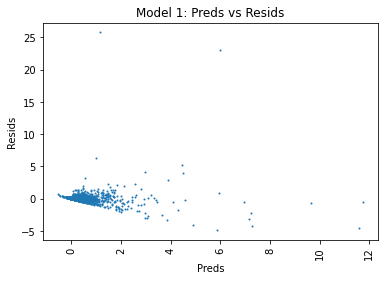

In [150]:
#E / Homoscedasticity
#Scatter plot of predicted against residuals
plt.scatter(y_pred, y_resids, s=1);
plt.title('Model 1: Preds vs Resids')
plt.xlabel('Preds')
plt.ylabel('Resids')
plt.xticks(rotation=90);

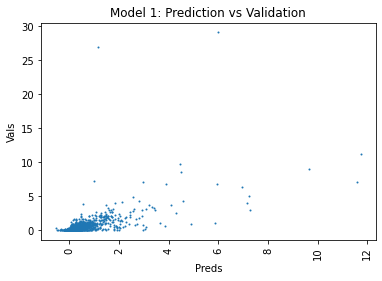

In [151]:
#L Linearity

plt.scatter(y_pred, y_test, s=1);
plt.title('Model 1: Prediction vs Validation')
plt.xlabel('Preds')
plt.ylabel('Vals')
plt.xticks(rotation=90);


Text(0, 0.5, 'Frequency')

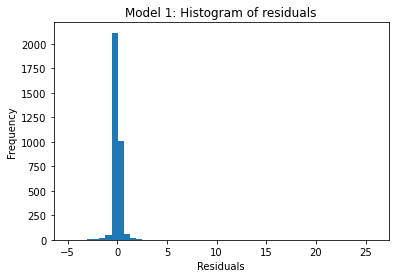

In [152]:
#N Normality

plt.hist(y_resids, bins=50);
plt.title('Model 1: Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

**Ridge**

In [155]:
alphas=np.logspace(0,6,100)

model2_ridge=RidgeCV(alphas=alphas, cv=5)

model2_ridge.fit(X_train_ss2,y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.14975700e+00, 1.32194115e+00, 1.51991108e+00,
       1.74752840e+00, 2.00923300e+00, 2.31012970e+00, 2.65608778e+00,
       3.05385551e+00, 3.51119173e+00, 4.03701726e+00, 4.64158883e+00,
       5.33669923e+00, 6.13590727e+00, 7.05480231e+00, 8.11130831e+00,
       9.32603347e+00, 1.07226722e+01, 1.23284674e+01, 1.41747416e+01,
       1.62975083e+01, 1.87381742e+0...
       4.03701726e+04, 4.64158883e+04, 5.33669923e+04, 6.13590727e+04,
       7.05480231e+04, 8.11130831e+04, 9.32603347e+04, 1.07226722e+05,
       1.23284674e+05, 1.41747416e+05, 1.62975083e+05, 1.87381742e+05,
       2.15443469e+05, 2.47707636e+05, 2.84803587e+05, 3.27454916e+05,
       3.76493581e+05, 4.32876128e+05, 4.97702356e+05, 5.72236766e+05,
       6.57933225e+05, 7.56463328e+05, 8.69749003e+05, 1.00000000e+06]),
        cv=5)

In [348]:
model2_ridge.best_score_

0.6615060355917735

In [349]:
ridge_train_score=model2_ridge.score(X_train_ss2,y_train)
print(f'LR training Score: {ridge_train_score}')

LR training Score: 0.683078389505992


In [350]:
ridge_test_score=model2_ridge.score(X_test_ss2,y_test)
print(f'LR testing Score: {ridge_test_score}')

LR testing Score: 0.41689545422175944


In [351]:
y_pred_ridge=model2_ridge.predict(X_test_ss2)

In [352]:
#RMSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge))
print(RMSE)

0.7147237854908652


**Random Forest**

A Random Forest was done in which the paramters were placed with a random state was 42. 

In [212]:
rf_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestRegressor(random_state = 42))
])

rf_params = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth' : [1, 2, 3, 4],
    'rf__min_samples_split' : [2, 3, 4],
    'rf__max_features' : ['sqrt', 'log2', None]
}

rf_gs = GridSearchCV(rf_pipe, param_grid = rf_params)

rf_gs.fit(X_train_df, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'rf__max_depth': [1, 2, 3, 4],
                         'rf__max_features': ['sqrt', 'log2', None],
                         'rf__min_samples_split': [2, 3, 4],
                         'rf__n_estimators': [50, 100, 150]})

These were the best parameters and a prediction was made for each the train and test. 

In [215]:
rf_test_preds = rf_gs.predict(X_test_df)
rf_gs.best_params_

{'rf__max_depth': 4,
 'rf__max_features': None,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 50}

The train score r squared values was 0.765 and the testing r squared score was 0.46

In [262]:
print('Random Forest Train R squared:', rf_gs.score(X_train_df, y_train))
print('Random Forest test R squared:', rf_gs.score(X_test_df, y_test))

Random Forest Train R squared: 0.7652385465762968
Random Forest test R squared: 0.46006031209605946


The RMSE score for the testing data was 0.687

In [268]:
print('Random Forest test RMSE:', mean_squared_error(y_test, rf_val_preds, squared = False))

Random Forest test RMSE: 0.6877611618188832


Conclusion: When it came to comparing the RMSE scores from the baseline, Linear Regression model, and Random Forest, the random forest had the lowest RMSE which indicates a better model compared to the linear regression and baseline. 